In [4]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

## Modelo ARDL

De acuerdo con lo aprendido con los tutoriales se procede a aplicar el modelo ADRL a los datos solicitados.

In [6]:
# Primero se actualiza la versión de R en Kaggle, así como algunas versiones de dependencias de la paquetería ARDL. Este proceso es tardado.
#install.packages("CCA")
devtools::install_version("pbkrtest", version = "0.5.1")

rlang      (1.1.2    -> 1.1.3   ) [CRAN]
glue       (1.6.2    -> 1.7.0   ) [CRAN]
cli        (3.6.1    -> 3.6.2   ) [CRAN]
fansi      (1.0.5    -> 1.0.6   ) [CRAN]
tidyselect (1.2.0    -> 1.2.1   ) [CRAN]
Rcpp       (1.0.11   -> 1.0.12  ) [CRAN]
fs         (1.6.3    -> 1.6.4   ) [CRAN]
testthat   (3.2.1    -> 3.2.1.1 ) [CRAN]
tidyr      (1.3.0    -> 1.3.1   ) [CRAN]
lme4       (1.1-35.1 -> 1.1-35.3) [CRAN]


Installing 10 packages: rlang, glue, cli, fansi, tidyselect, Rcpp, fs, testthat, tidyr, lme4

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘rlang’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘glue’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘cli’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘fansi’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘Rcpp’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘fs’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘tidyselect’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
install.packages("ARDL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘car’, ‘dynlm’




In [8]:
## Se cargan las librerías necesarias
library(ARDL)
library(tidyverse) 
library(fields)  
library(forecast)  
library(quantmod) 
library(dygraphs) 
library(dplyr)    
library(ggplot2) 
library(tseries)   
library(tidyverse)   
library(urca)
library(TSstudio)
theme_set(theme_bw())
options(warn = - 1) 

To cite the ARDL package in publications:

Use this reference to refer to the validity of the ARDL package.

  Natsiopoulos, Kleanthis, and Tzeremes, Nickolaos G. (2022). ARDL
  bounds test for cointegration: Replicating the Pesaran et al. (2001)
  results for the UK earnings equation using R. Journal of Applied
  Econometrics, 37(5), 1079-1090. https://doi.org/10.1002/jae.2919

Use this reference to cite this specific version of the ARDL package.

  Kleanthis Natsiopoulos and Nickolaos Tzeremes (2023). ARDL: ARDL, ECM
  and Bounds-Test for Cointegration. R package version 0.2.4.
  https://CRAN.R-project.org/package=ARDL

Loading required package: spam

Spam version 2.10-0 (2023-10-23) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following objects are masked from ‘package:ba

ERROR: Error in library(TSstudio): there is no package called ‘TSstudio’


### Carga de los datos

Se procede a cargar la información de acuerdo a lo especificado en el modulo

In [9]:
# Especificamos las fechas de inicio y fin.
start<-format(as.Date("2019-04-22"),"%Y-%m-%d")
end<-format(as.Date("2022-12-31"),"%Y-%m-%d")

#Se crea la función para traer la información de yahoo finance
precio<-function(simbolo) {
  ##---------Obtener precios de yahoo finance:
  datos<-getSymbols(simbolo,  from=start, to= end, auto.assign = FALSE)
  ##---------eliminar datos faltantes:
  datos<-na.omit(datos)
  ##--------Mantener el precio de interis:
  datos<-datos[,4]
  assign(simbolo, datos, envir = .GlobalEnv)
}

In [10]:
### Importamos la información

precio("RYLD")   
precio("TSLA") 
precio("TM")
precio("GM")


In [11]:
## Juntamos la información
prices<-merge.xts(`RYLD`,`TSLA`, `TM`, `GM`,join='inner')%>% na.omit()
dim(prices)
## Cambiamos los nombres de las columnas
colnames(prices)<-c("RYLD", "TSLA", "TM", "GM")
head(prices)

Warning message in merge.xts(RYLD, TSLA, TM, GM, join = "inner"):
“'join' only applicable to two object merges”


[1] 933   4

             RYLD     TSLA     TM    GM
2019-04-22 24.995 17.51667 124.16 39.50
2019-04-23 25.157 17.59333 124.94 39.83
2019-04-24 25.189 17.24400 122.88 39.72
2019-04-25 25.130 16.50867 123.19 39.11
2019-04-26 25.225 15.67600 123.62 39.68
2019-04-29 25.250 16.09800 123.81 40.01

### Validación de la información

Se procede a visualizar la información y verificar que no sea estacionaria.

In [17]:
## Se traspasa al formato ts y se separan por variable para facilitar su manejo
y <- ts(prices$RYLD, start = c(2017, 5), frequency = 365)
tsla <- ts(prices$TSLA, start = c(2017, 5), frequency = 365)
tm <- ts(prices$TM, start = c(2017, 5), frequency = 365)
gm <- ts(prices$GM, start = c(2017, 5), frequency = 365)
precio.ts <- ts(prices, start = c(2017, 5), frequency = 365)

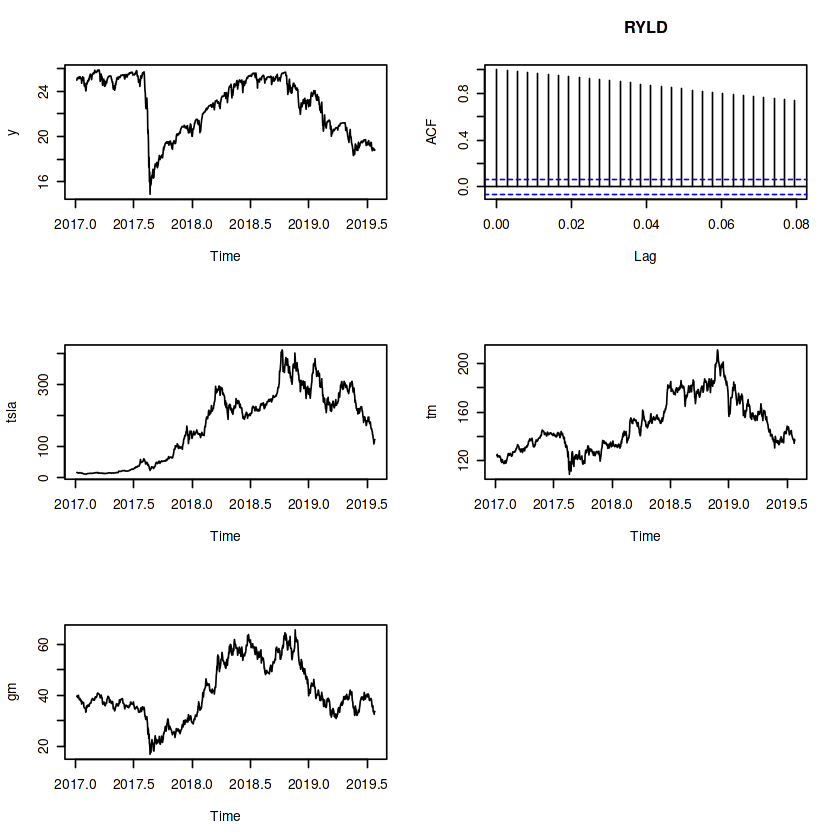

In [18]:
## Se procede a visualizar la serie de tiempo y confirmar que la variable dependiente o de respuesta no es estacionaria

#Podemos  visualizar la serie de tiempo y confirmar que la variable de respuesta no es estacionaria (mediante el acf)
par(mfrow=c(3,2))
ts.plot(y)
acf(y)
ts.plot(tsla)
ts.plot(tm)
ts.plot(gm)

#### Prueba de estacionariedad

Se procede a verificar que la información de la variable de respuesta no sea estacionaria

In [19]:
install.packages("fUnitRoots")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
## Se cargan librerias que se necesitaran para proceder
library(fUnitRoots)
adfTest(y)
adfTest(tsla)
adfTest(tm)
adfTest(gm)



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -1.0095
  P VALUE:
    0.2946 

Description:
 Thu May 23 07:11:47 2024 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -0.4265
  P VALUE:
    0.4804 

Description:
 Thu May 23 07:11:47 2024 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -0.0794
  P VALUE:
    0.591 

Description:
 Thu May 23 07:11:47 2024 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -0.5451
  P VALUE:
    0.4426 

Description:
 Thu May 23 07:11:47 2024 by user: 

Ya que los resultados de p-value son mayores al 5% no podemos rechazar la hipotesis nula por lo que se puede afirmar que ninguna de las series es estacionaria

### Partición de la Información

Se procede a partir la información de acuerdo con lo solicitado con lo datos de test siendo un 5% del total. Se debe tomar en cuenta que en este caso RYLD sera la variable dependiente y.

In [21]:
## Se procede a partir la informacióm
Pr <- precio.ts
h <- round(length(Pr)*0.05, digits = 0 )
h
Pr_tra <- Pr[1:(nrow(Pr) - h), ]
Pr_tes<- Pr[(nrow(Pr) - h + 1):nrow(Pr), ]

[1] 187

### Construcción del modelo ARDL

Ya verificado que las series no son estacionarias se procede a construir el modelo con base en lo aprendido con los tutoriales de clase

In [22]:
#Se realiza una búsqueda tipo grid search:
#Selección automatica:
models <- auto_ardl(RYLD ~ TSLA +TM + GM, data = Pr_tra, max_order = 6)

In [23]:
#Revisemos el top 20 de los mejores modelos según su critrio de información de Akaike
models$top_orders

RYLD,TSLA,TM,GM,AIC
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,1,1,3,-243.5539
3,2,1,3,-243.0087
3,1,2,3,-241.7062
3,2,2,3,-241.1285
3,1,1,4,-240.4193
4,1,1,3,-240.2553
4,2,1,3,-239.6883
3,2,3,3,-239.6807
4,1,1,4,-238.7867


In [28]:
## Se procede a construir el modelo con la mejor combinación
#Procedemos a construir el modelo de regresión con la mejor combinación.
mod1 <- ardl(RYLD ~ TSLA +TM + GM, data = Pr_tra, order = c(3,1,1,3))
summary(mod1)


Time series regression with "ts" data:
Start = 4, End = 746

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.68494 -0.09094  0.01362  0.10752  0.71663 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.122116   0.102351   1.193  0.23321    
L(RYLD, 1)   0.851471   0.033652  25.302  < 2e-16 ***
L(RYLD, 2)   0.380169   0.041873   9.079  < 2e-16 ***
L(RYLD, 3)  -0.249013   0.033415  -7.452 2.60e-13 ***
TSLA         0.006503   0.001031   6.305 4.99e-10 ***
L(TSLA, 1)  -0.006938   0.001044  -6.646 5.89e-11 ***
TM           0.028570   0.003863   7.395 3.88e-13 ***
L(TM, 1)    -0.027217   0.003895  -6.988 6.28e-12 ***
GM           0.094008   0.007944  11.834  < 2e-16 ***
L(GM, 1)    -0.076703   0.011133  -6.890 1.21e-11 ***
L(GM, 2)    -0.036112   0.011148  -3.239  0.00125 ** 
L(GM, 3)     0.022152   0.008188   2.705  0.00698 ** 
---
Signif. codes:  0 ‘***’ 0.

In [29]:
## Se imprime la formula para poder observar los srezagos
mod1$full_formula

RYLD ~ L(RYLD, 1) + L(RYLD, 2) + L(RYLD, 3) + TSLA + L(TSLA, 
    1) + TM + L(TM, 1) + GM + L(GM, 1) + L(GM, 2) + L(GM, 3)

In [30]:
### Se podría generar un modelo con tendencia para ver como se comporta. Sin embargo, se destaca que Y no parecia tener tendencia
mod1_ten <- ardl(RYLD ~ TSLA +TM + GM + trend(RYLD),data = Pr_tra, order = c(3,1,1,3))
summary(mod1_ten)


Time series regression with "ts" data:
Start = 4, End = 746

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.68262 -0.09344  0.01158  0.10681  0.71875 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1317387  0.1034046   1.274  0.20306    
trend(RYLD) -0.0001079  0.0001621  -0.666  0.50564    
L(RYLD, 1)   0.8500274  0.0337347  25.197  < 2e-16 ***
L(RYLD, 2)   0.3797989  0.0418922   9.066  < 2e-16 ***
L(RYLD, 3)  -0.2496546  0.0334419  -7.465 2.37e-13 ***
TSLA         0.0065832  0.0010388   6.337 4.09e-10 ***
L(TSLA, 1)  -0.0069023  0.0010458  -6.600 7.89e-11 ***
TM           0.0287132  0.0038709   7.418 3.31e-13 ***
L(TM, 1)    -0.0268856  0.0039279  -6.845 1.62e-11 ***
GM           0.0940059  0.0079468  11.829  < 2e-16 ***
L(GM, 1)    -0.0768590  0.0111393  -6.900 1.13e-11 ***
L(GM, 2)    -0.0360920  0.0111526  -3.236  0.00127 ** 
L(GM, 3)     0.02

### Pronóstico 

Se realiza el pronostico a 10 días de acuerdo con lo solicitado. Para lograr esto se corre el modelo con los datos completos (precio.ts)

In [68]:
### Se vuelve a correr el modelo sin tendencia con las caracteristicas definidas con todos los datos
mod1 <- ardl(RYLD ~ TSLA +TM + GM, data = precio.ts, order = c(3,1,1,3))
summary(mod1)


Time series regression with "ts" data:
Start = 2017(8), End = 2019(207)

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.68079 -0.09527  0.01100  0.11051  0.75287 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1251244  0.0832777   1.502 0.133313    
L(RYLD, 1)   0.8691677  0.0302154  28.766  < 2e-16 ***
L(RYLD, 2)   0.3331719  0.0382673   8.706  < 2e-16 ***
L(RYLD, 3)  -0.2184549  0.0299465  -7.295 6.46e-13 ***
TSLA         0.0059425  0.0008642   6.876 1.14e-11 ***
L(TSLA, 1)  -0.0063057  0.0008642  -7.297 6.37e-13 ***
TM           0.0271981  0.0033956   8.010 3.47e-15 ***
L(TM, 1)    -0.0259829  0.0034262  -7.584 8.23e-14 ***
GM           0.0932308  0.0072608  12.840  < 2e-16 ***
L(GM, 1)    -0.0772961  0.0101365  -7.625 6.06e-14 ***
L(GM, 2)    -0.0335375  0.0100614  -3.333 0.000893 ***
L(GM, 3)     0.0204129  0.0073473   2.778 0.005576 ** 
---
S

          Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2019.5671       19.57594 19.33552 19.81637 19.20825 19.94364
2019.5699       19.58653 19.23597 19.93709 19.05039 20.12267
2019.5726       19.71475 19.27414 20.15536 19.04090 20.38860
2019.5753       19.67490 19.15480 20.19499 18.87948 20.47031
2019.5781       19.72531 19.13279 20.31783 18.81912 20.63150
2019.5808       19.93330 19.27365 20.59294 18.92445 20.94214
2019.5836       19.84354 19.12104 20.56604 18.73857 20.94850
2019.5863       19.93204 19.15026 20.71381 18.73642 21.12765
2019.5890       19.93732 19.09935 20.77528 18.65576 21.21887
2019.5918       19.36907 18.47761 20.26052 18.00570 20.73243

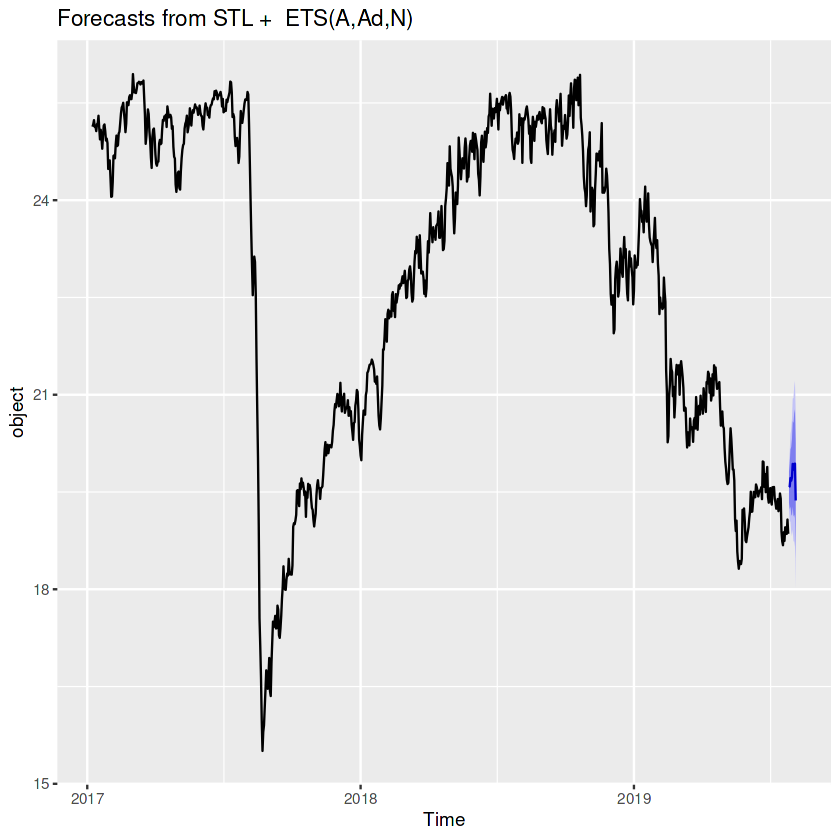

In [69]:
### Se corre la predicción a 10 días
stats::predict(mod1$fitted.values, h=10)
autoplot(predict(mod1$fitted.values, h=10))

#### Bound test para la verificacion de relaciones a largo termino
Se realiza la prueba de de hipotesis de Wald que evalua si los coeficientes de rezagos son iguales a cero, o de lo contrario existe evidencia que alguno de ellos es diferente de cero

In [76]:
## Se corre model para toda la información
models <- auto_ardl(RYLD ~ TSLA +TM + GM, data = precio.ts, max_order = 6)

#Guardamos el mejor modelo obtenido en la sección anterior
modelo <- models$best_model
#Realizamos la prueba de hipotesis
bounds_f_test(modelo, case = 2) # el parametro "case" igual a 2 verifica si existe relaciones a largo termino, con la combinación de (restricted constant, no linear trend).


	Bounds F-test (Wald) for no cointegration

data:  d(RYLD) ~ L(RYLD, 1) + L(TSLA, 1) + L(TM, 1) + L(GM, 1) + d(L(RYLD,     1)) + d(L(RYLD, 2)) + d(TSLA) + d(TM) + d(GM) + d(L(GM, 1)) +     d(L(GM, 2))
F = 2.5764, p-value = 0.2269
alternative hypothesis: Possible cointegration
null values:
   k    T 
   3 1000 


In [77]:
## Se corre el modelo con tendencia para toda la información
mod1_ten <- ardl(RYLD ~ TSLA +TM + GM + trend(RYLD),data = precio.ts, order = c(3,1,1,3))

In [78]:
#Realizamos la prueba de hipotesis para el modelo con tendencia con toda la información
bounds_f_test(mod1_ten, case = 4) # el parametro "case" igual a 4 implica (unrestricted constant, linear trend)


	Bounds F-test (Wald) for no cointegration

data:  d(RYLD) ~ trend(RYLD) + L(RYLD, 1) + L(TSLA, 1) + L(TM, 1) +     L(GM, 1) + d(L(RYLD, 1)) + d(L(RYLD, 2)) + d(TSLA) + d(TM) +     d(GM) + d(L(GM, 1)) + d(L(GM, 2))
F = 2.4289, p-value = 0.4466
alternative hypothesis: Possible cointegration
null values:
   k    T 
   3 1000 


Con base en esto se puede concluir que no se rechaza la hipótesis nula de no cointegración, sugiriendo que no hay suficiente evidencia estadística para concluir que existe una relación de cointegración entre las variables.

#### Mutiplicadores de largo y corto termino
Cuando revisamos los coeficientes de un modelo de regresión lineal, sabemos que existe un cambio en Y por un cambio de una unidad de X. Como revisamos en la lectura, los multiplicadores son la suma de los coeficientes a largo o corto termino. En este sentido podemos calcular los multiplicadores usando la siguiente función:

In [79]:
#Multiplicadores a corto plazo
multipliers(modelo, type = "sr")

,Term,Estimate,Std. Error,t value,Pr(>|t|)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,(Intercept),0.125124406,0.0832776854,1.502496,1.333129e-01
2,TSLA,0.005942519,0.0008642271,6.876109,1.136058e-11
3,TM,0.027198119,0.0033955775,8.009866,3.466678e-15
4,GM,0.093230840,0.0072607789,12.840336,7.943358e-35


In [80]:
#Multiplicadores a largo plazo
multipliers(modelo)

,Term,Estimate,Std. Error,t value,Pr(>|t|)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,(Intercept),7.76433869,4.211770938,1.843486,0.0655803287
2,TSLA,-0.02253428,0.006109202,-3.688579,0.0002387627
3,TM,0.07541091,0.039973739,1.886511,0.0595414986
4,GM,0.17438164,0.058875592,2.961866,0.0031366089


### Cálculo de métricas de error de pronóstico

Se procede a calcular las metricas de error de pronostico para los dos modelos

#### Modelo 1 (Sin Tendencia)

Se realiza la prueba con el modelo 1. Cabe destacar que se corre el modelo nuevamente con los datos Pr_tra

In [36]:
## Se vuelve a correr el modelo solo con la información de entrenamiento
mod1 <- ardl(RYLD ~ TSLA +TM + GM, data = Pr_tra, order = c(3,1,1,3))

In [63]:
## Se procede a hacer la predicción de los datos de prueba para calcular las métricas

test_rows <- round(length(Pr)*0.05, digits = 0 )

predicciones <- stats::predict(mod1$fitted.values, h=test_rows)$mean ## Se toma solo el valor promedio


# Calcular el error absoluto
error_absoluto <- abs(predicciones - Pr_tes[,1])

# Calcular el MAE
MAE <- mean(error_absoluto)

# Calcular el RMSE
RMSE <- sqrt(mean((predicciones - Pr_tes[,1])^2))

# Mostrar los resultados
print(paste("MAE:", MAE))
print(paste("RMSE:", RMSE))

[1] "MAE: 3.82788653921921"
[1] "RMSE: 4.03962687803722"


#### Modelo 2 (Con Tendencia)

Se realiza la prueba con el modelo 2. Cabe destacar que se corre el modelo nuevamente con los datos Pr_tra

In [65]:
mod1_ten <- ardl(RYLD ~ TSLA +TM + GM + trend(RYLD),data = Pr_tra, order = c(3,1,1,3))

In [66]:
## Se procede a hacer la predicción de los datos de prueba para calcular las métricas

test_rows <- round(length(Pr)*0.05, digits = 0 )

predicciones <- stats::predict(mod1_ten$fitted.values, h=test_rows)$mean ## Se toma solo el valor promedio


# Calcular el error absoluto
error_absoluto <- abs(predicciones - Pr_tes[,1])

# Calcular el MAE
MAE <- mean(error_absoluto)

# Calcular el RMSE
RMSE <- sqrt(mean((predicciones - Pr_tes[,1])^2))

# Mostrar los resultados
print(paste("MAE:", MAE))
print(paste("RMSE:", RMSE))

[1] "MAE: 3.83023432151003"
[1] "RMSE: 4.04188841040365"


Como se puede observar con los resultados el modelo que no da uso a la tendencia parece ser más efectivo